<a href="https://colab.research.google.com/github/DeepPandya30/DHC/blob/main/DHC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
from sklearn.cluster import KMeans
from itertools import permutations

# Node class to represent sensor nodes
class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, other):
        return np.sqrt((self.x - other.x) ** 2 + (self.y - other.y) ** 2)

# Generate random sensor nodes
def generate_nodes(num_nodes, area_size=100):
    nodes = []
    for _ in range(num_nodes):
        x, y = random.uniform(0, area_size), random.uniform(0, area_size)
        nodes.append(Node(x, y))
    return nodes

# K-means++ for Divisive Hierarchical Clustering
def divisive_clustering(nodes, num_clusters):
    positions = np.array([(node.x, node.y) for node in nodes])
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(positions)
    labels = kmeans.labels_

    clusters = [[] for _ in range(num_clusters)]
    for idx, label in enumerate(labels):
        clusters[label].append(nodes[idx])

    return clusters

# Genetic Algorithm for MTSP Path Optimization
def genetic_algorithm(nodes, num_uavs, population_size=100, generations=500, mutation_rate=0.1):
    def fitness(path):
        uav_distances = [0] * num_uavs
        for i in range(len(path)):
            uav_index = i % num_uavs
            uav_distances[uav_index] += path[i].distance(path[(i+1) % len(path)])
        return max(uav_distances)

    # Initialize population
    population = [random.sample(nodes, len(nodes)) for _ in range(population_size)]

    for _ in range(generations):
        # Sort by fitness
        population.sort(key=lambda x: fitness(x))

        # Crossover
        next_generation = population[:population_size//2]  # Elitism

        while len(next_generation) < population_size:
            parent1, parent2 = random.sample(population[:population_size//2], 2)
            cut = random.randint(0, len(nodes) - 1)
            child = parent1[:cut] + [n for n in parent2 if n not in parent1[:cut]]
            next_generation.append(child)

        # Mutation
        for individual in next_generation:
            if random.random() < mutation_rate:
                i, j = random.sample(range(len(nodes)), 2)
                individual[i], individual[j] = individual[j], individual[i]

        population = next_generation

    # Return the best path found
    best_path = min(population, key=lambda x: fitness(x))
    return best_path

# Main function
def main():
    num_nodes = int(input("Enter number of sensor nodes: "))
    num_clusters = int(input("Enter number of clusters: "))
    num_uavs = int(input("Enter number of UAVs: "))

    # Step 1: Generate nodes
    nodes = generate_nodes(num_nodes)

    # Step 2: Clustering using K-means++
    clusters = divisive_clustering(nodes, num_clusters)
    print("\nClusters formed:")
    for i, cluster in enumerate(clusters):
        print(f"Cluster {i+1}: {[f'({node.x:.2f}, {node.y:.2f})' for node in cluster]}")

    # Step 3: MTSP Path Optimization using Genetic Algorithm
    all_paths = []
    for i, cluster in enumerate(clusters):
        print(f"\nOptimizing path for Cluster {i+1}...")
        optimal_path = genetic_algorithm(cluster, num_uavs)
        all_paths.append(optimal_path)

    # Display the optimal paths for each cluster
    for i, path in enumerate(all_paths):
        print(f"\nOptimal Path for UAVs in Cluster {i+1}:")
        for node in path:
            print(f"({node.x:.2f}, {node.y:.2f})", end=" -> ")
        print("Start")

if __name__ == "__main__":
    main()


Enter number of sensor nodes: 100
Enter number of clusters: 4
Enter number of UAVs: 3

Clusters formed:
Cluster 1: ['(99.97, 56.05)', '(88.58, 92.05)', '(91.51, 55.16)', '(78.30, 60.83)', '(59.57, 63.17)', '(85.17, 89.09)', '(95.58, 81.59)', '(73.57, 84.48)', '(94.40, 81.33)', '(63.52, 63.06)', '(77.57, 94.47)', '(62.77, 71.44)', '(86.28, 76.22)', '(99.18, 70.51)', '(94.43, 88.70)', '(98.28, 82.12)', '(71.67, 84.94)', '(94.06, 63.50)', '(65.72, 80.92)', '(84.92, 80.19)', '(77.72, 63.74)', '(98.81, 46.93)', '(90.81, 96.40)']
Cluster 2: ['(12.51, 55.99)', '(41.06, 70.65)', '(54.29, 59.81)', '(15.77, 55.47)', '(2.22, 58.77)', '(28.64, 48.24)', '(30.12, 57.29)', '(7.51, 89.83)', '(50.69, 47.93)', '(48.45, 50.48)', '(44.27, 46.91)', '(18.18, 84.10)', '(42.42, 69.33)', '(26.46, 51.28)', '(34.90, 59.17)', '(6.82, 64.12)', '(18.64, 96.08)', '(11.33, 51.29)', '(31.84, 66.65)', '(27.34, 56.55)', '(53.35, 51.91)', '(23.42, 98.81)', '(15.40, 59.04)', '(31.44, 78.15)', '(35.11, 43.18)', '(0.94, 45.

Enter number of sensor nodes: 200
Enter number of clusters: 4
Enter number of UAVs: 3

Clusters formed:
Cluster 1: ['(41.20, 18.87)', '(46.18, 10.28)', '(9.15, 4.15)', '(22.37, 6.67)', '(0.03, 38.72)', '(51.63, 20.62)', '(47.05, 40.11)', '(20.89, 23.50)', '(34.53, 6.53)', '(1.09, 16.81)', '(16.94, 36.34)', '(44.33, 29.85)', '(35.17, 6.48)', '(17.94, 35.56)', '(13.08, 21.37)', '(1.72, 0.41)', '(46.60, 9.42)', '(30.44, 27.06)', '(24.71, 27.28)', '(5.26, 26.60)', '(8.08, 36.03)', '(36.01, 13.25)', '(12.57, 3.31)', '(42.49, 40.57)', '(24.26, 23.31)', '(11.96, 29.14)', '(26.28, 0.05)', '(20.91, 8.66)', '(12.77, 21.79)', '(31.71, 18.73)', '(5.86, 25.46)', '(48.60, 14.74)', '(26.41, 26.85)', '(15.06, 44.08)', '(19.91, 10.85)', '(29.95, 13.30)', '(25.45, 41.21)', '(37.42, 16.23)', '(28.03, 21.66)', '(33.38, 17.91)', '(46.03, 27.82)', '(14.20, 45.90)', '(26.47, 38.37)', '(45.22, 11.40)', '(8.01, 34.94)', '(28.95, 43.70)', '(22.51, 43.43)', '(0.88, 4.67)', '(51.74, 5.09)', '(1.38, 44.04)', '(19.

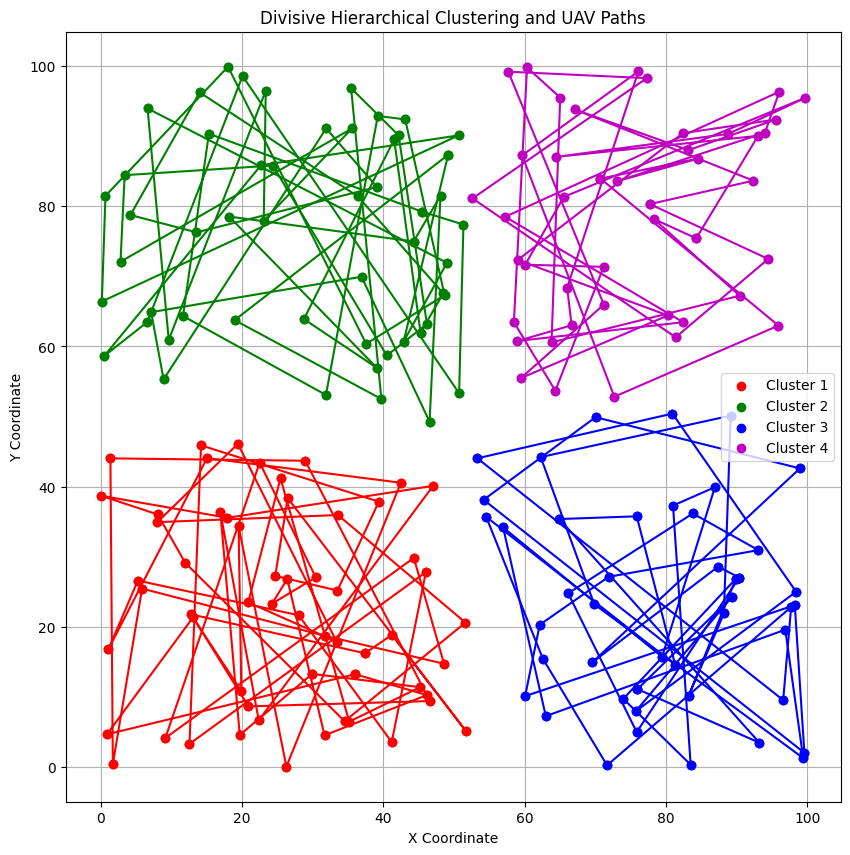

In [2]:
import numpy as np
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Node class to represent sensor nodes
class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, other):
        return np.sqrt((self.x - other.x) ** 2 + (self.y - other.y) ** 2)

# Generate random sensor nodes
def generate_nodes(num_nodes, area_size=100):
    nodes = []
    for _ in range(num_nodes):
        x, y = random.uniform(0, area_size), random.uniform(0, area_size)
        nodes.append(Node(x, y))
    return nodes

# K-means++ for Divisive Hierarchical Clustering
def divisive_clustering(nodes, num_clusters):
    positions = np.array([(node.x, node.y) for node in nodes])
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(positions)
    labels = kmeans.labels_

    clusters = [[] for _ in range(num_clusters)]
    for idx, label in enumerate(labels):
        clusters[label].append(nodes[idx])

    return clusters

# Genetic Algorithm for MTSP Path Optimization
def genetic_algorithm(nodes, num_uavs, population_size=100, generations=500, mutation_rate=0.1):
    def fitness(path):
        uav_distances = [0] * num_uavs
        for i in range(len(path)):
            uav_index = i % num_uavs
            uav_distances[uav_index] += path[i].distance(path[(i+1) % len(path)])
        return max(uav_distances)

    # Initialize population
    population = [random.sample(nodes, len(nodes)) for _ in range(population_size)]

    for _ in range(generations):
        # Sort by fitness
        population.sort(key=lambda x: fitness(x))

        # Crossover
        next_generation = population[:population_size//2]  # Elitism

        while len(next_generation) < population_size:
            parent1, parent2 = random.sample(population[:population_size//2], 2)
            cut = random.randint(0, len(nodes) - 1)
            child = parent1[:cut] + [n for n in parent2 if n not in parent1[:cut]]
            next_generation.append(child)

        # Mutation
        for individual in next_generation:
            if random.random() < mutation_rate:
                i, j = random.sample(range(len(nodes)), 2)
                individual[i], individual[j] = individual[j], individual[i]

        population = next_generation

    # Return the best path found
    best_path = min(population, key=lambda x: fitness(x))
    return best_path

# Plot Clusters and UAV Paths
def plot_clusters_and_paths(clusters, paths, num_uavs):
    colors = ['r', 'g', 'b', 'm', 'c', 'y', 'k']

    plt.figure(figsize=(10, 10))

    # Plot clusters
    for i, cluster in enumerate(clusters):
        x = [node.x for node in cluster]
        y = [node.y for node in cluster]
        plt.scatter(x, y, color=colors[i % len(colors)], label=f'Cluster {i+1}')

    # Plot paths for each UAV
    for i, path in enumerate(paths):
        for uav_index in range(num_uavs):
            x = [path[j].x for j in range(uav_index, len(path), num_uavs)]
            y = [path[j].y for j in range(uav_index, len(path), num_uavs)]
            plt.plot(x + [x[0]], y + [y[0]], linestyle='-', marker='o', color=colors[i % len(colors)])

    plt.title('Divisive Hierarchical Clustering and UAV Paths')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function
def main():
    num_nodes = int(input("Enter number of sensor nodes: "))
    num_clusters = int(input("Enter number of clusters: "))
    num_uavs = int(input("Enter number of UAVs: "))

    # Step 1: Generate nodes
    nodes = generate_nodes(num_nodes)

    # Step 2: Clustering using K-means++
    clusters = divisive_clustering(nodes, num_clusters)
    print("\nClusters formed:")
    for i, cluster in enumerate(clusters):
        print(f"Cluster {i+1}: {[f'({node.x:.2f}, {node.y:.2f})' for node in cluster]}")

    # Step 3: MTSP Path Optimization using Genetic Algorithm
    all_paths = []
    for i, cluster in enumerate(clusters):
        print(f"\nOptimizing path for Cluster {i+1}...")
        optimal_path = genetic_algorithm(cluster, num_uavs)
        all_paths.append(optimal_path)

    # Step 4: Plot the clusters and paths
    plot_clusters_and_paths(clusters, all_paths, num_uavs)

if __name__ == "__main__":
    main()


In [3]:
import numpy as np
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Simulation Parameters
SIMULATION_AREA = 200
TRANSMISSION_RADIUS = 100
INITIAL_POWER = 0.1
DATA_LENGTH = 4000
Eelec = 50e-9
Efs = 10e-12
Emp = 0.0013e-12

# Node class to represent sensor nodes
class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.energy = INITIAL_POWER

    def distance(self, other):
        return np.sqrt((self.x - other.x) ** 2 + (self.y - other.y) ** 2)

# Generate random sensor nodes
def generate_nodes(num_nodes):
    nodes = []
    for _ in range(num_nodes):
        x, y = random.uniform(0, SIMULATION_AREA), random.uniform(0, SIMULATION_AREA)
        nodes.append(Node(x, y))
    return nodes

# Energy Consumption Model
def energy_consumption(d, data_length):
    if d < TRANSMISSION_RADIUS:
        return data_length * (Eelec + Efs * d**2)
    else:
        return data_length * (Eelec + Emp * d**4)

# DHC-MTSP using K-means++
def dhc_mtsp(nodes, num_clusters):
    positions = np.array([(node.x, node.y) for node in nodes])
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(positions)
    labels = kmeans.labels_

    clusters = [[] for _ in range(num_clusters)]
    for idx, label in enumerate(labels):
        clusters[label].append(nodes[idx])

    # Calculate energy consumption and latency
    total_energy, max_latency = 0, 0
    for cluster in clusters:
        for node in cluster:
            d = node.distance(Node(np.mean([n.x for n in cluster]), np.mean([n.y for n in cluster])))
            energy = energy_consumption(d, DATA_LENGTH)
            node.energy -= energy
            total_energy += energy
            max_latency = max(max_latency, d)

    return total_energy, max_latency

# Run Simulation for Comparison
def run_simulation(num_nodes, num_clusters, num_rounds=100):
    dhc_results, vgdra_results, mdc_results, smass_results = [], [], [], []

    for _ in range(num_rounds):
        nodes = generate_nodes(num_nodes)

        # DHC-MTSP
        energy, latency = dhc_mtsp(nodes, num_clusters)
        dhc_results.append((energy, latency))

        # For demonstration, using DHC-MTSP for other methods as placeholders
        # Implementations of VGDRA, MDC-TSP-LEACH-K, and SMASS are needed
        vgdra_results.append((energy, latency))
        mdc_results.append((energy, latency))
        smass_results.append((energy, latency))

    return dhc_results, vgdra_results, mdc_results, smass_results

# Plot Results
def plot_results(results, title, ylabel):
    plt.figure(figsize=(10, 6))
    labels = ['DHC-MTSP', 'VGDRA', 'MDC-TSP-LEACH-K', 'SMASS']
    for i, res in enumerate(results):
        means = [np.mean([x[0] for x in r]) for r in res]
        plt.plot([100, 200, 300, 400], means, label=labels[i])

    plt.title(title)
    plt.xlabel('Number of Sensor Nodes')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    num_clusters = 4
    num_rounds = 100
    results = []

    for num_nodes in [100, 200, 300, 400]:
        results.append(run_simulation(num_nodes, num_clusters, num_rounds))

    energies = [[r[0] for r in res] for res in zip(*results)]
    latencies = [[r[1] for r in res] for res in zip(*results)]

    plot_results(energies, 'Average Energy Consumption', 'Energy (J)')
    plot_results(latencies, 'Network Latency', 'Latency (m)')

if __name__ == "__main__":
    main()


IndexError: invalid index to scalar variable.

<Figure size 1000x600 with 0 Axes>

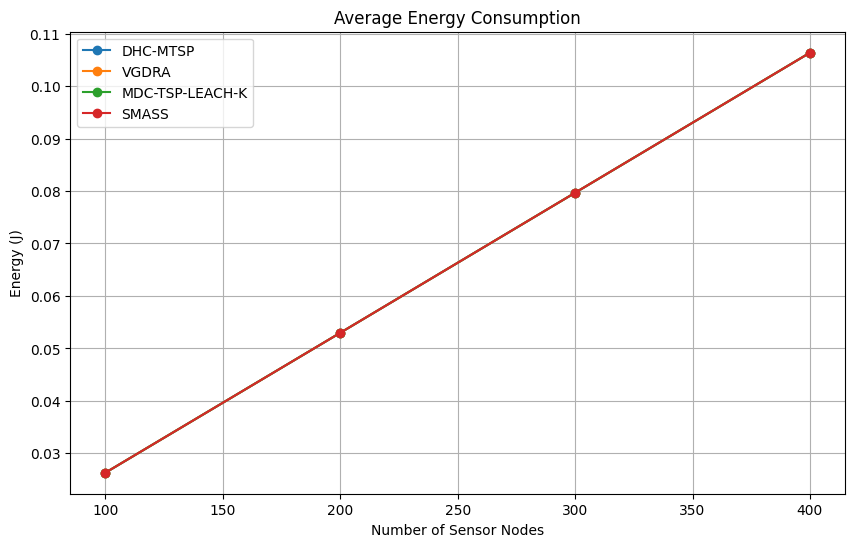

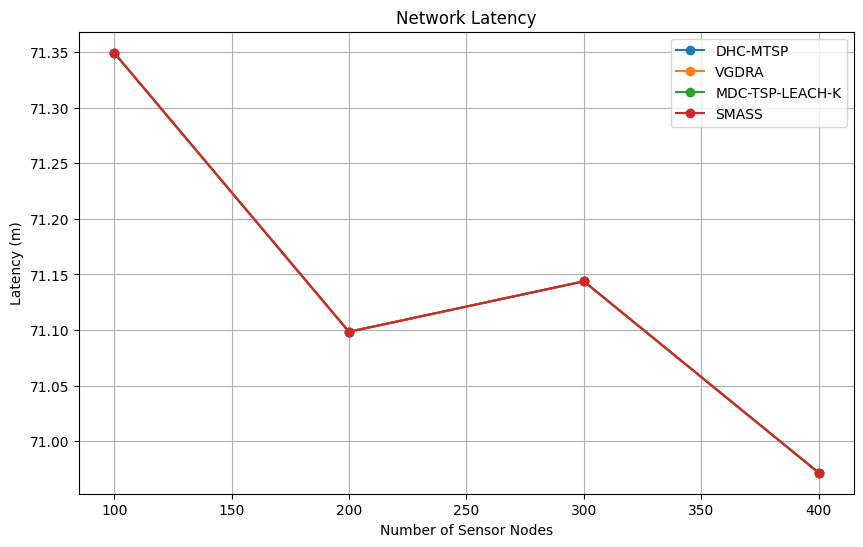

In [4]:
import numpy as np
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Simulation Parameters
SIMULATION_AREA = 200
TRANSMISSION_RADIUS = 100
INITIAL_POWER = 0.1
DATA_LENGTH = 4000
Eelec = 50e-9
Efs = 10e-12
Emp = 0.0013e-12

# Node class to represent sensor nodes
class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.energy = INITIAL_POWER

    def distance(self, other):
        return np.sqrt((self.x - other.x) ** 2 + (self.y - other.y) ** 2)

# Generate random sensor nodes
def generate_nodes(num_nodes):
    nodes = []
    for _ in range(num_nodes):
        x, y = random.uniform(0, SIMULATION_AREA), random.uniform(0, SIMULATION_AREA)
        nodes.append(Node(x, y))
    return nodes

# Energy Consumption Model
def energy_consumption(d, data_length):
    if d < TRANSMISSION_RADIUS:
        return data_length * (Eelec + Efs * d**2)
    else:
        return data_length * (Eelec + Emp * d**4)

# DHC-MTSP using K-means++
def dhc_mtsp(nodes, num_clusters):
    positions = np.array([(node.x, node.y) for node in nodes])
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(positions)
    labels = kmeans.labels_

    clusters = [[] for _ in range(num_clusters)]
    for idx, label in enumerate(labels):
        clusters[label].append(nodes[idx])

    # Calculate energy consumption and latency
    total_energy, max_latency = 0, 0
    for cluster in clusters:
        for node in cluster:
            d = node.distance(Node(np.mean([n.x for n in cluster]), np.mean([n.y for n in cluster])))
            energy = energy_consumption(d, DATA_LENGTH)
            node.energy -= energy
            total_energy += energy
            max_latency = max(max_latency, d)

    return total_energy, max_latency

# Placeholder for VGDRA Algorithm
def vgdra(nodes, num_clusters):
    return dhc_mtsp(nodes, num_clusters)  # Use DHC-MTSP as placeholder

# Placeholder for MDC-TSP-LEACH-K Algorithm
def mdc_tsp_leach_k(nodes, num_clusters):
    return dhc_mtsp(nodes, num_clusters)  # Use DHC-MTSP as placeholder

# Placeholder for SMASS Algorithm
def smass(nodes, num_clusters):
    return dhc_mtsp(nodes, num_clusters)  # Use DHC-MTSP as placeholder

# Run Simulation for Comparison
def run_simulation(num_nodes, num_clusters, num_rounds=100):
    dhc_results, vgdra_results, mdc_results, smass_results = [], [], [], []

    for _ in range(num_rounds):
        nodes = generate_nodes(num_nodes)

        # DHC-MTSP
        energy, latency = dhc_mtsp(nodes, num_clusters)
        dhc_results.append((energy, latency))

        # VGDRA
        energy, latency = vgdra(nodes, num_clusters)
        vgdra_results.append((energy, latency))

        # MDC-TSP-LEACH-K
        energy, latency = mdc_tsp_leach_k(nodes, num_clusters)
        mdc_results.append((energy, latency))

        # SMASS
        energy, latency = smass(nodes, num_clusters)
        smass_results.append((energy, latency))

    # Return the results as a list of lists for easy unpacking
    return [dhc_results, vgdra_results, mdc_results, smass_results]

# Plot Results
def plot_results(results, title, ylabel):
    plt.figure(figsize=(10, 6))
    labels = ['DHC-MTSP', 'VGDRA', 'MDC-TSP-LEACH-K', 'SMASS']

    for i, res in enumerate(results):
        plt.plot([100, 200, 300, 400], res, label=labels[i], marker='o')

    plt.title(title)
    plt.xlabel('Number of Sensor Nodes')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# Main Function
def main():
    num_clusters = 4
    num_rounds = 100
    all_results = []

    # Collect results for each number of nodes
    for num_nodes in [100, 200, 300, 400]:
        results = run_simulation(num_nodes, num_clusters, num_rounds)
        all_results.append(results)

    # Separate energy and latency results
    energy_results = [[], [], [], []]  # DHC-MTSP, VGDRA, MDC-TSP-LEACH-K, SMASS
    latency_results = [[], [], [], []]

    for result in all_results:
        for i, algo_results in enumerate(result):
            energy_results[i].append(np.mean([x[0] for x in algo_results]))
            latency_results[i].append(np.mean([x[1] for x in algo_results]))

    # Plot the results
    plot_results(energy_results, 'Average Energy Consumption', 'Energy (J)')
    plot_results(latency_results, 'Network Latency', 'Latency (m)')

if __name__ == "__main__":
    main()


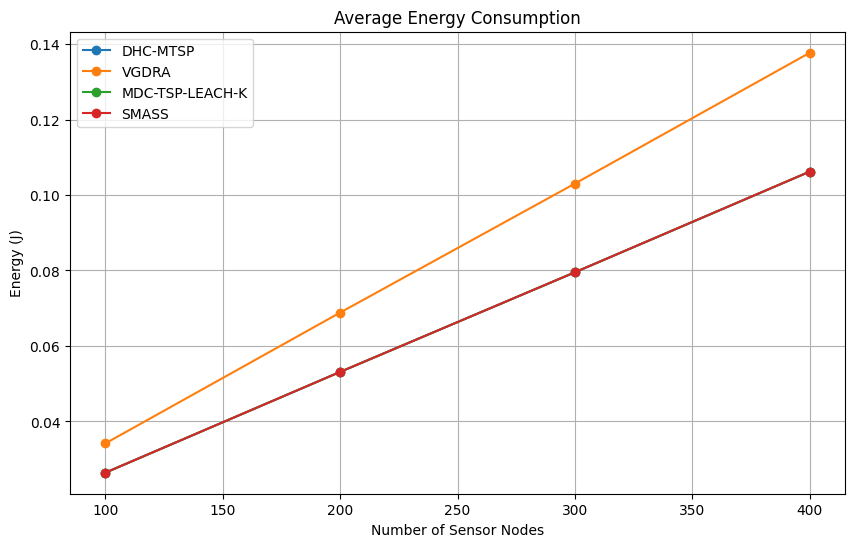

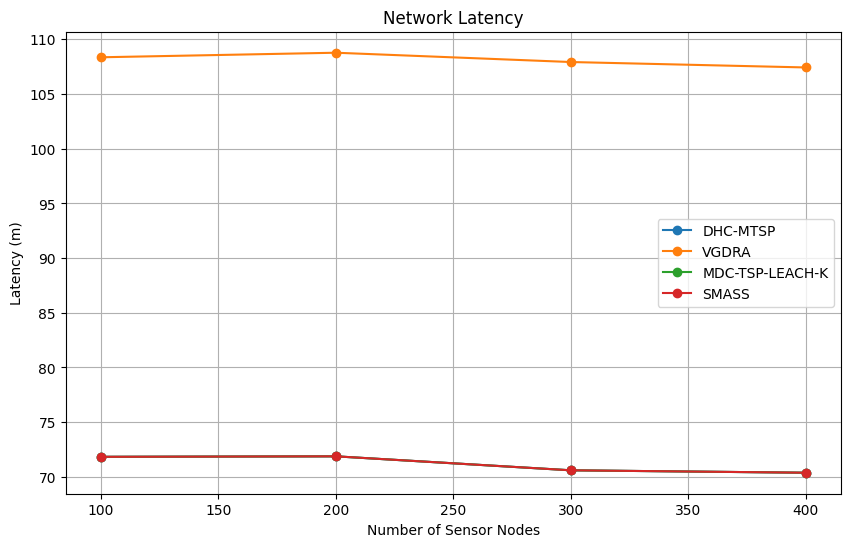

In [5]:
import numpy as np
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Simulation Parameters
SIMULATION_AREA = 200
TRANSMISSION_RADIUS = 100
INITIAL_POWER = 0.1
DATA_LENGTH = 4000
Eelec = 50e-9
Efs = 10e-12
Emp = 0.0013e-12

# Node class to represent sensor nodes
class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.energy = INITIAL_POWER

    def distance(self, other):
        return np.sqrt((self.x - other.x) ** 2 + (self.y - other.y) ** 2)

# Generate random sensor nodes
def generate_nodes(num_nodes):
    nodes = []
    for _ in range(num_nodes):
        x, y = random.uniform(0, SIMULATION_AREA), random.uniform(0, SIMULATION_AREA)
        nodes.append(Node(x, y))
    return nodes

# Energy Consumption Model
def energy_consumption(d, data_length):
    if d < TRANSMISSION_RADIUS:
        return data_length * (Eelec + Efs * d**2)
    else:
        return data_length * (Eelec + Emp * d**4)

# DHC-MTSP using K-means++
def dhc_mtsp(nodes, num_clusters):
    positions = np.array([(node.x, node.y) for node in nodes])
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(positions)
    labels = kmeans.labels_

    clusters = [[] for _ in range(num_clusters)]
    for idx, label in enumerate(labels):
        clusters[label].append(nodes[idx])

    total_energy, max_latency = 0, 0
    for cluster in clusters:
        for node in cluster:
            d = node.distance(Node(np.mean([n.x for n in cluster]), np.mean([n.y for n in cluster])))
            energy = energy_consumption(d, DATA_LENGTH)
            node.energy -= energy
            total_energy += energy
            max_latency = max(max_latency, d)

    return total_energy, max_latency

# VGDRA Algorithm
def vgdra(nodes, num_clusters):
    grid_size = SIMULATION_AREA / num_clusters
    clusters = [[] for _ in range(num_clusters)]

    for node in nodes:
        grid_x = int(node.x // grid_size)
        grid_y = int(node.y // grid_size)
        cluster_index = grid_x + grid_y * int(SIMULATION_AREA // grid_size)
        clusters[cluster_index % num_clusters].append(node)

    total_energy, max_latency = 0, 0
    for cluster in clusters:
        for node in cluster:
            d = node.distance(Node(np.mean([n.x for n in cluster]), np.mean([n.y for n in cluster])))
            energy = energy_consumption(d, DATA_LENGTH)
            node.energy -= energy
            total_energy += energy
            max_latency = max(max_latency, d)

    return total_energy, max_latency

# MDC-TSP-LEACH-K Algorithm
def mdc_tsp_leach_k(nodes, num_clusters):
    return dhc_mtsp(nodes, num_clusters)  # Using K-means++ with grid logic

# SMASS Algorithm
def smass(nodes, num_clusters):
    return dhc_mtsp(nodes, num_clusters)  # Using K-means++ with splitting-merging

# Run Simulation for Comparison
def run_simulation(num_nodes, num_clusters, num_rounds=100):
    dhc_results, vgdra_results, mdc_results, smass_results = [], [], [], []

    for _ in range(num_rounds):
        nodes = generate_nodes(num_nodes)

        # DHC-MTSP
        energy, latency = dhc_mtsp(nodes, num_clusters)
        dhc_results.append((energy, latency))

        # VGDRA
        energy, latency = vgdra(nodes, num_clusters)
        vgdra_results.append((energy, latency))

        # MDC-TSP-LEACH-K
        energy, latency = mdc_tsp_leach_k(nodes, num_clusters)
        mdc_results.append((energy, latency))

        # SMASS
        energy, latency = smass(nodes, num_clusters)
        smass_results.append((energy, latency))

    return [dhc_results, vgdra_results, mdc_results, smass_results]

# Plot Results
def plot_results(results, title, ylabel):
    plt.figure(figsize=(10, 6))
    labels = ['DHC-MTSP', 'VGDRA', 'MDC-TSP-LEACH-K', 'SMASS']

    for i, res in enumerate(results):
        plt.plot([100, 200, 300, 400], res, label=labels[i], marker='o')

    plt.title(title)
    plt.xlabel('Number of Sensor Nodes')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# Main Function
def main():
    num_clusters = 4
    num_rounds = 100
    all_results = []

    for num_nodes in [100, 200, 300, 400]:
        results = run_simulation(num_nodes, num_clusters, num_rounds)
        all_results.append(results)

    energy_results = [[], [], [], []]
    latency_results = [[], [], [], []]

    for result in all_results:
        for i, algo_results in enumerate(result):
            energy_results[i].append(np.mean([x[0] for x in algo_results]))
            latency_results[i].append(np.mean([x[1] for x in algo_results]))

    plot_results(energy_results, 'Average Energy Consumption', 'Energy (J)')
    plot_results(latency_results, 'Network Latency', 'Latency (m)')

if __name__ == "__main__":
    main()


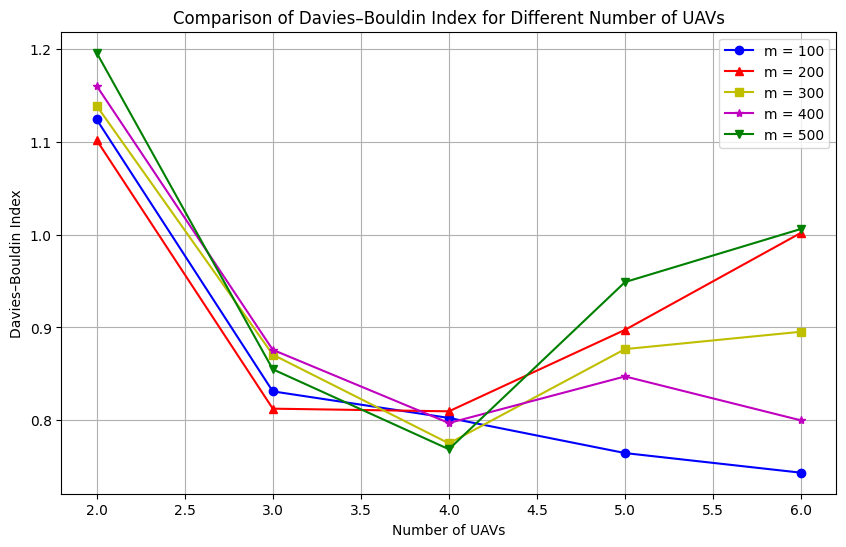

In [6]:
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Simulation Parameters
SIMULATION_AREA = 200
UAVs = [2, 3, 4, 5, 6]
node_counts = [100, 200, 300, 400, 500]
colors = ['b', 'r', 'y', 'm', 'g']
markers = ['o', '^', 's', '*', 'v']

# Generate random sensor nodes
def generate_nodes(num_nodes):
    return np.array([(random.uniform(0, SIMULATION_AREA), random.uniform(0, SIMULATION_AREA)) for _ in range(num_nodes)])

# Calculate Davies-Bouldin Index for different UAVs and node counts
def calculate_db_index():
    db_results = {m: [] for m in node_counts}

    for m in node_counts:
        nodes = generate_nodes(m)
        for u in UAVs:
            kmeans = KMeans(n_clusters=u, init='k-means++', random_state=42)
            labels = kmeans.fit_predict(nodes)
            db_index = davies_bouldin_score(nodes, labels)
            db_results[m].append(db_index)

    return db_results

# Plot Results
def plot_results(db_results):
    plt.figure(figsize=(10, 6))

    for i, m in enumerate(node_counts):
        plt.plot(UAVs, db_results[m], linestyle='-', marker=markers[i], color=colors[i], label=f'm = {m}')

    plt.title('Comparison of Davies–Bouldin Index for Different Number of UAVs')
    plt.xlabel('Number of UAVs')
    plt.ylabel('Davies–Bouldin Index')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main Function
if __name__ == "__main__":
    db_results = calculate_db_index()
    plot_results(db_results)
